### 岭回归
- 加了L2正则的线性回归，代价函数不一致，则梯度计算稍微有些不一致

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [221]:
class RidgeRegression(object):
    def __init__(self, learning_rate = 0.1, epochs = 500, verbose=False, mu=0.5):
        self.theta = None
        self.b = None
        self.alpha = learning_rate
        self.epochs = epochs
        self.verbose = verbose
        self.mu = mu
    def train(self, train_x, train_y):
        if len(train_y.shape) == 1:
            train_y = train_y.reshape(-1, 1)
        m , n = train_x.shape
        np.random.seed(78)
        mu = 0.4
        sigma = 0.8
        self.theta = sigma*np.random.randn(1,n)+mu
        self.b = np.random.random()
#         self.theta = np.zeros((1,n))
#         self.b = 0.
        for i in xrange(self.epochs):
            pre_y = self.predict(train_x)
            d_theta = np.mean((pre_y - train_y)*train_x,axis=0) + self.mu*self.theta
            d_b    = np.mean(pre_y - train_y, axis=0)
            self.theta -= self.alpha * d_theta
            self.b     -= self.alpha * d_b
            if self.verbose is True and (i+1) % 100 == 0:
                print "the %d epoch, the W is %d and the b is %d" \
                % (i, self.theta, self.b)
    def fit(self, train_x, train_y):
        self.train(train_x, train_y)
    def predict(self, x):
        """
        type sita:([[]])
        type b:float
        type X:([[]])
        rtype:([[]])
        """
        pre = np.dot(x , self.theta.T) + self.b
        return pre

### 测试岭回归 

In [149]:
def load_data():
    # X is the 10x10 Hilbert matrix
    X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
    y = np.ones(10)
    return X , y

In [239]:
def ridge_regression(x, y):
    n_mus = 50
    mus = np.logspace(-20, -1, n_mus)
    weights = []
    for temp_mu in mus:
        rg = RidgeRegression(learning_rate=0.1, epochs=100000, mu=temp_mu)
        rg.train(x, y)
        weights.append(rg.theta[0])
    print len(weights), len(weights[0])
    plt.figure(figsize=(15, 9))
    ax = plt.gca()
    ax.plot(mus, weights)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization')
    plt.axis('tight')

In [241]:
def ridge_regression_sklearn(x, y):
    n_mus = 50
    mus = np.logspace(-10, -2, n_mus)
    weights = []
    for temp_mu in mus:
        rg = linear_model.Ridge(alpha=temp_mu,  fit_intercept=False)
        rg.fit(x, y)
        weights.append(rg.coef_)
    print len(weights), len(weights[0])
    plt.figure(figsize=(12, 7))
    ax = plt.gca()
    ax.plot(mus, weights)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha')
    plt.ylabel('weights')
    plt.title('Ridge coefficients as a function of the regularization')
    plt.axis('tight')

In [202]:
x, y = load_data()

In [203]:
x.shape

(10, 10)

50 10


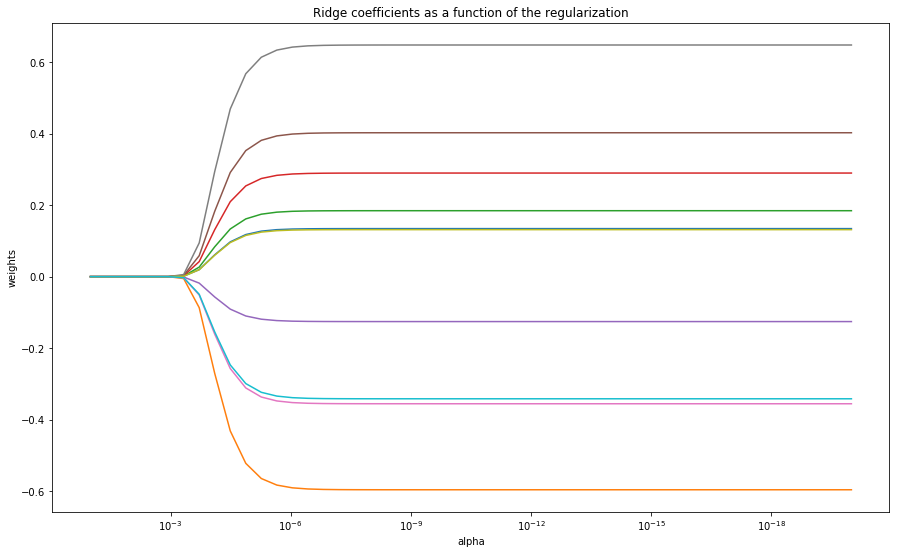

In [240]:
ridge_regression(x, y)

50 10


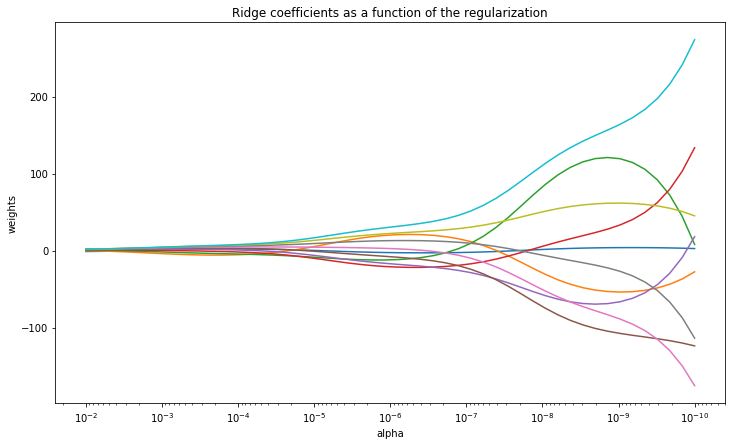

In [242]:
ridge_regression_sklearn(x, y)